<a href="https://colab.research.google.com/github/thomaasflx/2024_Geoinformatique_I/blob/main/Geoinformatique_I/IP/Exercices_IP/S4_IP_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 4 - Fonction et calcul scientifique

## Numpy pour le calcul scientifique et Matplotlib

**Objectifs d'apprentissage**

* Créer de nouveaux tableaux en utilisant `linspace` et `arange`.
* Calculer des formules de base avec les tableaux `numpy`.
Charger des données à partir de fichiers `.npy` * Effectuer des réductions (par exemple `.npy`)
* Effectuer des réductions (par exemple `mean`, `std` sur les tableaux `numpy`)
* Réaliser des tracés linéaires 1D
* Réaliser des diagrammes de dispersion
* Annoter les graphiques avec des titres et des axes

Dans ce problème, nous utilisons des données réelles provenant de flotteurs de profilage océanique. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) sont des instruments robotiques autonomes qui recueillent des données sur la température, la salinité et la pression de l'océan. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) recueillent un "profil" (un ensemble de mesures à différentes profondeurs ou "niveaux").

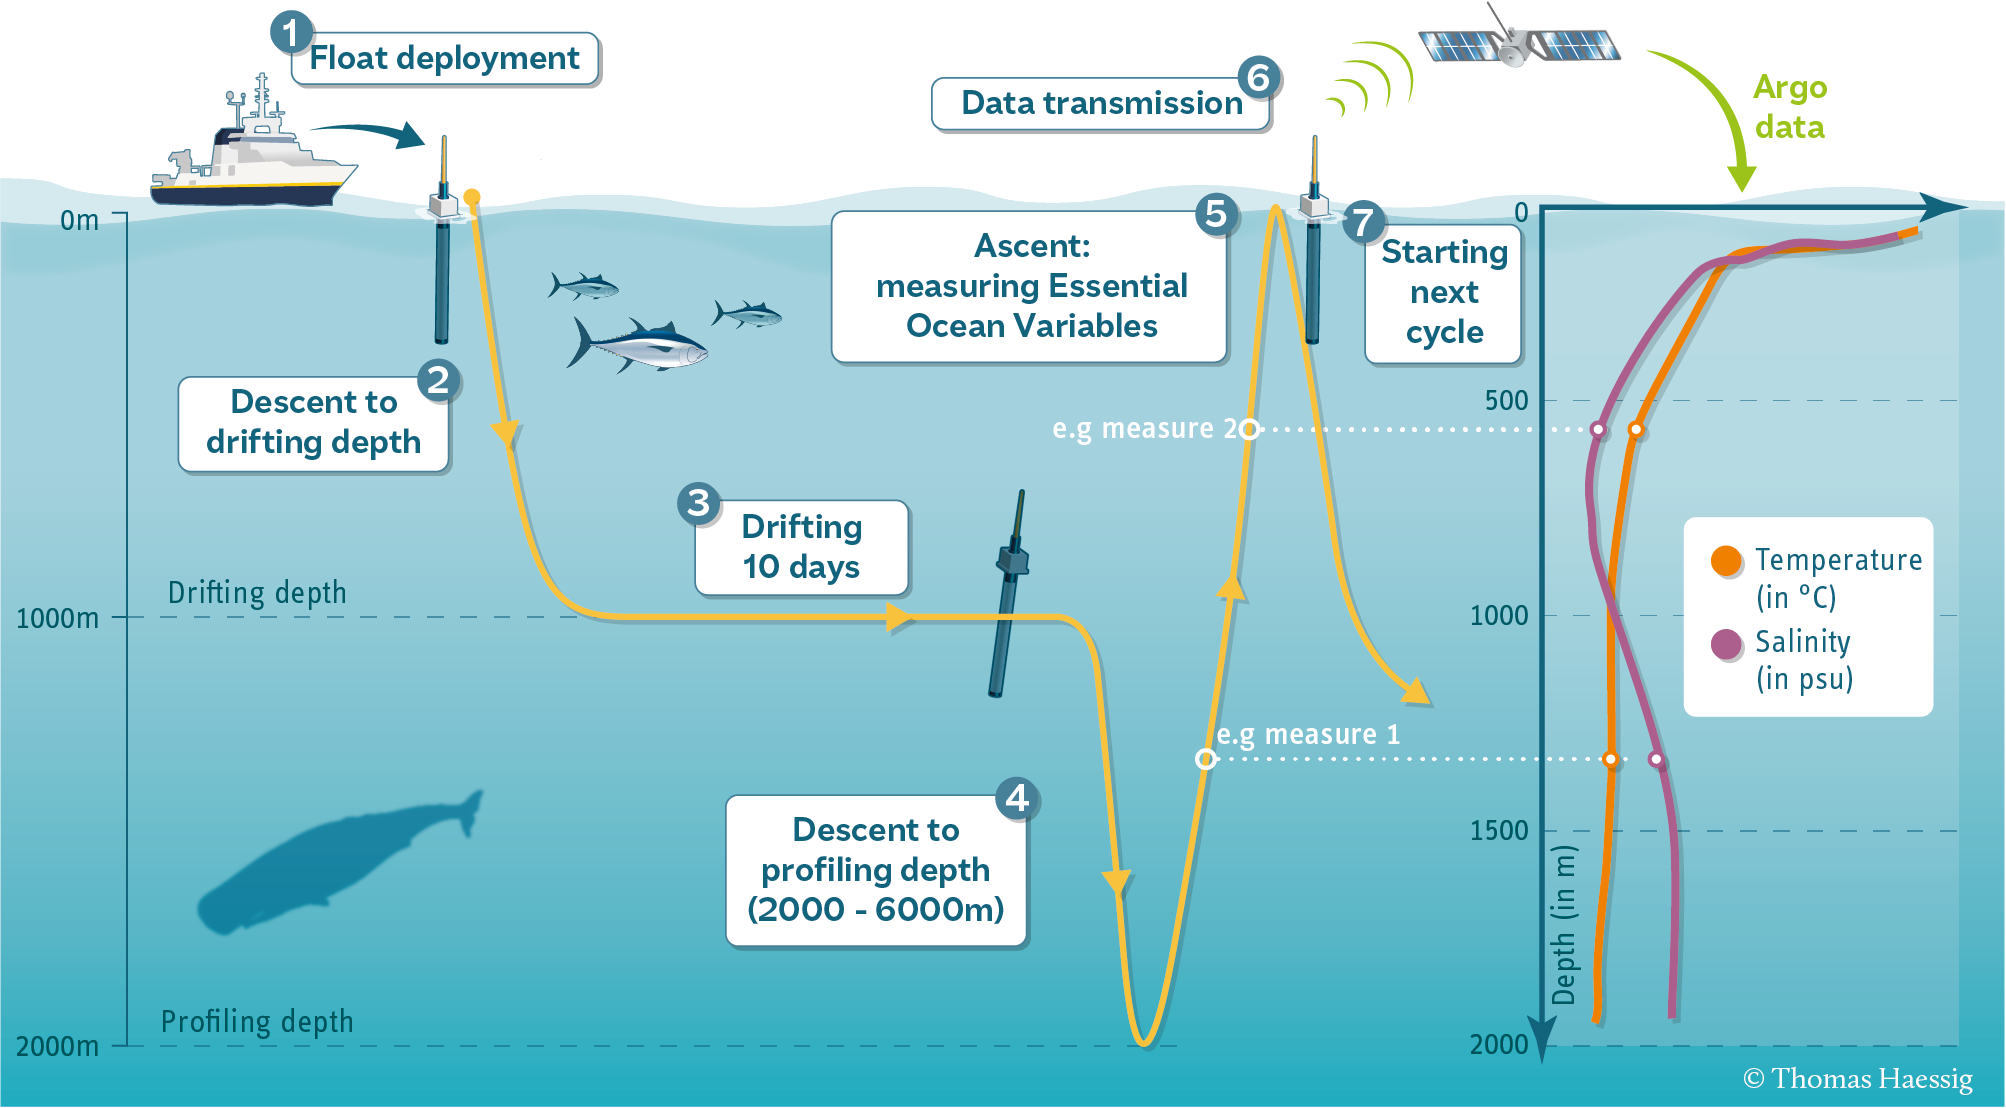


Chaque profil est associé à une latitude, une longitude et une date, ainsi qu'à de nombreux niveaux différents.

Commençons par utiliser [pooch](https://www.fatiando.org/pooch/latest/) pour télécharger les fichiers de données dont nous avons besoin pour cet exercice. Le code suivant vous donnera une liste de fichiers `.npy` que vous pourrez ouvrir à l'étape suivante.

In [92]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy']

In [93]:
import numpy as np

**Q1) Chargez chaque fichier de données sous la forme d'un tableau `numpy`.**

Vous pouvez utiliser les noms que vous voulez pour vos tableaux, mais nous recommandons :

`T` : température

`S` : salinité

`P` : pression

`date` : date

`lat` : latitude

`lon` : longitude

`level` : niveau de profondeur

Astuce 1 : Regardez le nom du fichier (les éléments dans `files`) pour savoir quel fichier correspond à quelle variable.

Astuce 2 : Consultez la documentation de [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Afficher les noms des éléments des fichiers ici

In [94]:
T = np.load('T.npy')
S = np.load('S.npy')
P = np.load('P.npy')
date = np.load('date.npy')
lat = np.load('lat.npy')
lon = np.load('lon.npy')
levels = np.load('levels.npy')


print("Fichiers chargés et leurs variables associées :")
print(f"T : Température (T.npy)")
print(f"S : Salinité (S.npy)")
print(f"P : Pression (P.npy)")
print(f"date : Date (date.npy)")
print(f"lat : Latitude (lat.npy)")
print(f"lon : Longitude (lon.npy)")
print(f"levels : Niveau de profondeur (levels.npy)")

Fichiers chargés et leurs variables associées :
T : Température (T.npy)
S : Salinité (S.npy)
P : Pression (P.npy)
date : Date (date.npy)
lat : Latitude (lat.npy)
lon : Longitude (lon.npy)
levels : Niveau de profondeur (levels.npy)


Ensuite, chargez les fichiers sous forme de tableaux `numpy`, par exemple en utilisant la compréhension de liste

In [95]:
file_names = ['T.npy', 'S.npy', 'P.npy', 'date.npy', 'lat.npy', 'lon.npy', 'levels.npy']

T,S,P,date,lat,lon,levels = [np.load(file_names[i]) for i in range(len(file_names))]


print("Fichiers chargés sous forme de tableaux numpy :")
print(f"T : {T}")
print(f"S : {S}")
print(f"P : {P}")
print(f"date : {date}")
print(f"lat : {lat}")
print(f"lon : {lon}")
print(f"levels : {levels}")

Fichiers chargés sous forme de tableaux numpy :
T : [[18.97400093 18.43700027 19.09900093 ... 19.11300087 21.82299995
  20.13100052]
 [18.74099922 18.39999962 19.08200073 ... 18.47200012 19.45999908
  20.125     ]
 [18.37000084 18.37400055 19.06500053 ... 18.22999954 19.26199913
  20.07699966]
 ...
 [ 3.79299998  3.81399989  3.80200005 ...  3.80699992  3.81100011
   3.8599999 ]
 [ 3.76399994  3.77800012  3.75699997 ...  3.75399995  3.74600005
   3.80599999]
 [ 3.74399996  3.74600005  3.7249999  ...         nan  3.71399999
          nan]]
S : [[35.6389389  35.51495743 35.57297134 ... 35.82093811 35.77793884
  35.66891098]
 [35.63393784 35.5219574  35.57397079 ... 35.81093216 35.58389664
  35.66791153]
 [35.6819458  35.52595901 35.57297134 ... 35.79592896 35.66290665
  35.66591263]
 ...
 [34.91585922 34.92390442 34.92390442 ... 34.93481064 34.94081116
  34.94680786]
 [34.91585922 34.92390442 34.92190552 ... 34.93280792 34.93680954
  34.94380951]
 [34.91785812 34.92390442 34.92390442 ... 

**Q2) Recréez le tableau `level` en utilisant `np.arange` et `np.linspace`**.

Conseils :

* La documentation de `np.arange` est [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
* La documentation pour `np.linspace` est [à ce lien](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
* La documentation pour `np.testing.assert_equal` est [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Afficher le tableau `level` (niveau)

In [96]:
print(levels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recréer le tableau `level` en utilisant `np.arange` et l'appeler `level_arange`

In [97]:
level_arange = np.arange(0,78)

Vérifiez que `level` et `level_arange` sont égaux en utilisant `np.testing.assert_equal`

In [98]:
np.testing.assert_equal(levels,level_arange)

Recréer le tableau `level` en utilisant `np.linspace` et l'appeler `level_linspace`

In [99]:
level_linspace = np.linspace(0,77,78)

Vérifiez que `level` et `level_linspace` sont égaux en utilisant `np.testing.assert_equal`

In [100]:
np.testing.assert_equal(levels,level_linspace)

**Q3) Examinez les formes de `T`, `S` et `P` par rapport à `lon`, `lat`, `date` et `niveau`. Comment pensez-vous qu'ils sont liés ?**

Indice : consultez la sous-section [NDArrays](#NDArrays)

Afficher les formes de toutes les variables chargées

In [101]:
T.shape

(78, 75)

In [102]:
P.shape

(78, 75)

In [103]:
S.shape

(78, 75)

In [104]:
lon.shape

(75,)

In [105]:
lat.shape

(75,)

In [106]:
date.shape

(75,)

In [107]:
levels.shape

(78,)

D'après les formes, quelles sont les dimensions partagées entre les tableaux ?

**Q4) En vous basant sur la formule ci-dessous, calculez la densité de l'eau de mer `relative_density`, par rapport à l'eau pure, en fonction de la température, de la salinité et de la pression.**

`densité_relative`$ = ρ -ρ_{Eau pure} = a \times S +b \times \Theta + c \times \Theta^{2}$

où :

* Les densités $\rho$ et $ρ_{Pure\ eau}$ sont exprimées en unités $kg/m^{3}$.
* Les constantes $a$, $b$ et $c$ sont fournies ci-dessous.
* La fonction permettant de calculer la température conservative $\Theta$ (en unités Celcius) à partir de la température, de la salinité et de la pression est fournie ci-dessous.
* La température $T$ est exprimée en unités Celcius.
* La salinité $S$ est exprimée en unités $g/kg$.
* La pression $p$ est exprimée en unités $dbar$.

Astuce : Les tableaux `numpy` chargés `temperature`, `salinity`, et `pressure` ont déjà les bonnes unités et aucune conversion n'est nécessaire.

Sources :

1) [*Roquet, Fabien, et al. "Defining a simplified yet "realistic" equation of state for seawater." Journal of Physical Oceanography 45.10 (2015) : 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). (Licence)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Voici les constantes a, b et c :

In [108]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Importons la bibliothèque [`gsw`] (https://teos-10.github.io/GSW-Python/) qui contient la fonction `CS_from_t` pour calculer la température conservative $\Theta$ à partir de la température, de la salinité et de la pression.

In [109]:
!pip install gsw
from gsw import CT_from_t

Maintenant, c'est à vous de jouer. Voici l'équation pour éviter d'avoir à faire défiler la page vers le haut :

`densité_relative`$ = ρ -ρ_{Pure\ Eau} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculer la température conservatrice

Conseil : utilisez [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [111]:
température_conservative = CT_from_t(T,S,P)

Calculez la "densité relative" à l'aide de l'équation ci-dessus.

In [112]:
densité_relative = a*S + b*température_conservative + c*température_conservative**2
print(densité_relative)

[[18.36152674 18.3074983  18.34127024 ... 18.42715875 18.4688042
  18.39582104]
 [18.35542645 18.30967596 18.34171541 ... 18.41076618 18.35303668
  18.39580282]
 [18.36486576 18.31092749 18.34153802 ... 18.40115878 18.37679112
  18.39475388]
 ...
 [18.01515787 18.01831722 18.01809242 ... 18.02192599 18.02417064
  18.02719533]
 [18.02012438 18.0232203  18.02208142 ... 18.02588673 18.0270666
  18.03067945]
 [18.02598386 18.02798095 18.02760444 ...         nan 18.03207863
          nan]]


**Q4) Faites un graphique pour chaque colonne de données dans `T`, `S`, `P`, et
`densité_relative` (quatre plots)**

Pour cette question, nous devons utiliser l'interface [Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) de la bibliothèque [Matplotlib](https://matplotlib.org/) pour la visualisation, même si nous ne l'avons pas encore étudiée en profondeur en classe. Mais n'ayez crainte, nous vous fournissons des instructions faciles à suivre ci-dessous. 😊

La première étape consiste à importer Pyplot. Il suffit d'exécuter le code ci-dessous.

In [113]:
import matplotlib.pyplot as plt

Ensuite, nous tracerons les variables en fonction de la profondeur de l'océan, `level`. Il suffit de lire la documentation [sur ce lien] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) pour en déduire la syntaxe correcte. Etiquetez vos axes en utilisant `plt.xlabel` et `plt.ylabel`, et ajoutez un titre en utilisant `plt.title`.

Astuce : L'échelle verticale doit utiliser les données `level` pour être cohérente avec les conventions océanographiques.

Conseil 2 : Chaque graphique doit avoir une ligne pour chaque colonne de données. Le résultat sera désordonné, comme dans le graphique ci-dessous :

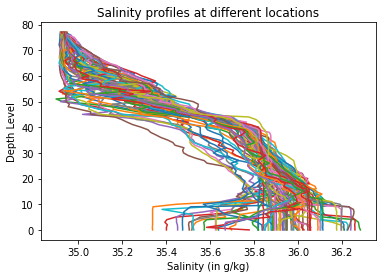

Text(0.5, 1.0, 'Température en fonction de la profondeur')

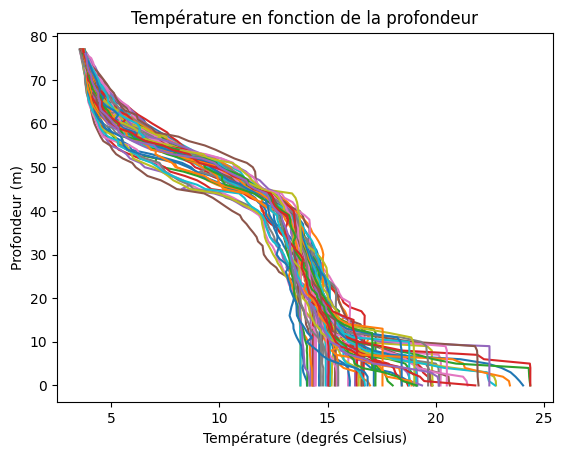

In [114]:
plt.plot(T,levels) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel("Température (degrés Celsius)") # Prend une chaîne de caractères comme argument
plt.ylabel("Profondeur (m)")
plt.title("Température en fonction de la profondeur")

Faites plus de plots ci-dessous:

Text(0.5, 1.0, 'Salinité en fonction de la profondeur')

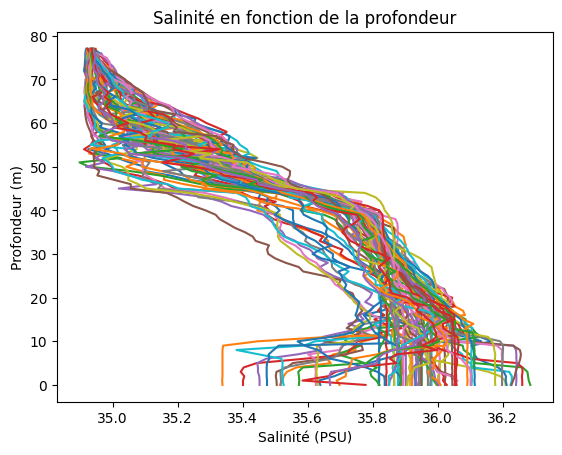

In [115]:
plt.plot(S,levels) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel("Salinité (PSU)") # Prend une chaîne de caractères comme argument
plt.ylabel("Profondeur (m)")
plt.title("Salinité en fonction de la profondeur")

Text(0.5, 1.0, 'Pression en fonction de la profondeur')

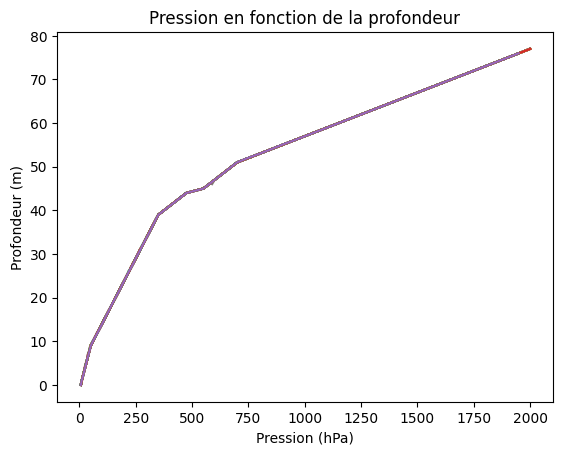

In [116]:
plt.plot(P,levels) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel("Pression (hPa)") # Prend une chaîne de caractères comme argument
plt.ylabel("Profondeur (m)")
plt.title("Pression en fonction de la profondeur")

Text(0.5, 1.0, 'Densité relative en fonction de la profondeur')

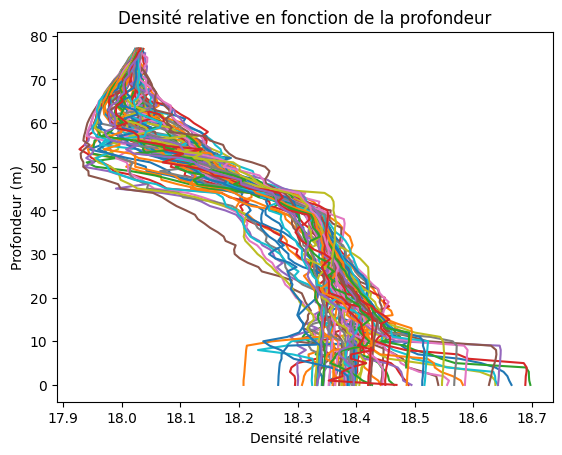

In [117]:
plt.plot(densité_relative,levels) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel("Densité relative") # Prend une chaîne de caractères comme argument
plt.ylabel("Profondeur (m)")
plt.title("Densité relative en fonction de la profondeur")

**Q5) Calculez la moyenne et l'écart-type de `T`, `S`, `P`, et `seawater_density` à chaque profondeur dans `level`.

Conseil : Vous pouvez lire la documentation sur [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) et [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Conseil 2 : Vous pouvez vérifier que vous avez pris la moyenne et les écarts types le long des axes corrects en vérifiant la "forme" de vos résultats.

Calculez les moyennes...

In [167]:
moyenne_T = np.mean(T,axis=1)

In [137]:
moyenne_S = np.mean(S,axis=1)

In [138]:
moyenne_P = np.mean(P,axis=1)

In [139]:
moyenne_densité_relative = np.mean(densité_relative,axis=1)

... et les écarts types.

In [164]:
écarts_types_T = np.std(T,axis=1)

In [142]:
écarts_types_S = np.std(S,axis=1)

In [141]:
écarts_types_P = np.std(P,axis=1)

In [140]:
écarts_types_densité_relative = np.std(densité_relative, axis=1)

Vérifiez qu'elles ont la même forme que vos coordonnées de niveau vertical `lev` :

In [166]:
np.testing.assert_equal(écarts_types_T.shape,levels.shape)
np.testing.assert_equal(moyenne_T.shape,levels.shape)

np.testing.assert_equal(écarts_types_S.shape,levels.shape)
np.testing.assert_equal(moyenne_S.shape,levels.shape)

np.testing.assert_equal(écarts_types_P.shape,levels.shape)
np.testing.assert_equal(moyenne_P.shape,levels.shape)

np.testing.assert_equal(écarts_types_densité_relative.shape,levels.shape)
np.testing.assert_equal(moyenne_densité_relative.shape,levels.shape)


AssertionError: 
Items are not equal:
 ACTUAL: 0
 DESIRED: 1

**Q6) Faites maintenant des tracés similaires, mais ne montrez que les moyennes `T`, `S`, `P`, et `densité_de_l'eau_de_mer` à chaque profondeur. Faites apparaître les barres d'erreur sur chaque graphique en utilisant les écarts-types**.

Astuce : Si vous vous sentez aventureux, vous pouvez utiliser directement la fonction [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).

Astuce 2 : Vous devriez obtenir des graphiques similaires à celui ci-dessous

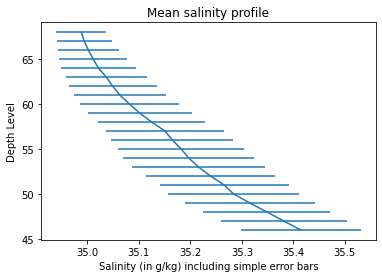

Text(0.5, 1.0, 'Température en fonction de la profondeur incluant les écarts-types')

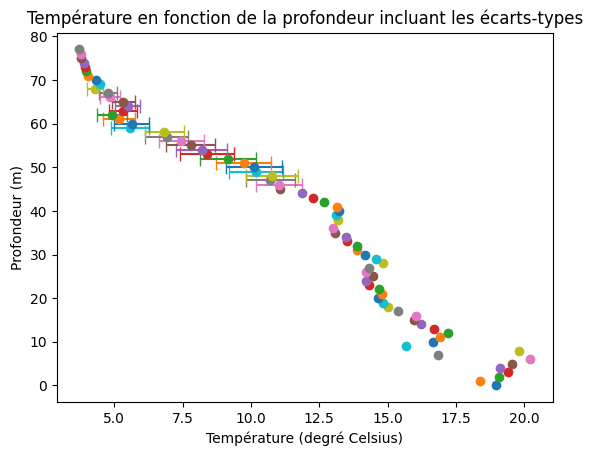

In [161]:
for i in range(len(levels)):
    plt.errorbar(T[i,i%T.shape[1]],levels[i],xerr=écarts_types_T[i], fmt="-o", capsize=5)

plt.xlabel("Température (degré Celsius)")
plt.ylabel("Profondeur (m)")
plt.title("Température en fonction de la profondeur incluant les écarts-types")



Encore trois plots et nous serons prêts 🙂 .

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1103: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1104: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])


Text(0.5, 1.0, 'Salinité en fonction de la profondeur incluant les écarts-types')

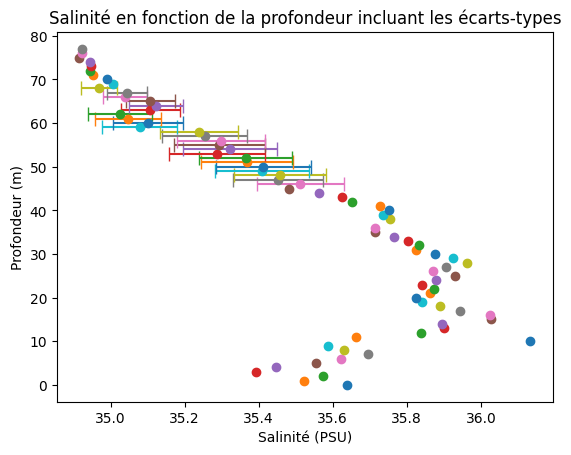

In [168]:
for i in range(len(levels)):
    plt.errorbar(S[i,i%S.shape[1]],levels[i],xerr=écarts_types_S[i], fmt="-o", capsize=5)

plt.xlabel("Salinité (PSU)")
plt.ylabel("Profondeur (m)")
plt.title("Salinité en fonction de la profondeur incluant les écarts-types")


Text(0.5, 1.0, 'Pression en fonction de la profondeur incluant les écarts-types')

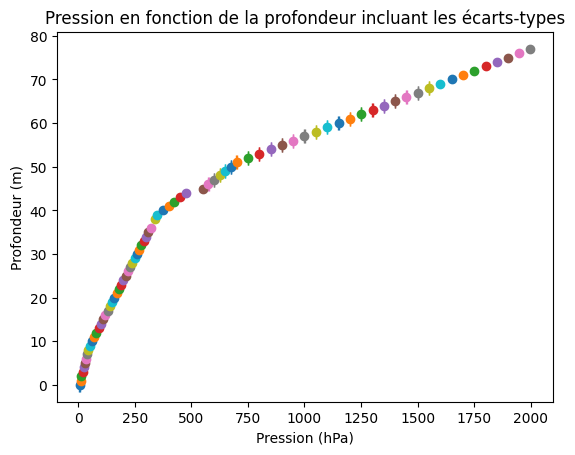

In [169]:
for i in range(len(levels)):
    plt.errorbar(P[i,i%P.shape[1]],levels[i],xerr=écarts_types_P[i], fmt="-o", capsize=5)

plt.xlabel("Pression (hPa)")
plt.ylabel("Profondeur (m)")
plt.title("Pression en fonction de la profondeur incluant les écarts-types")


Text(0.5, 1.0, 'Densité relative en fonction de la profondeur incluant les écarts-types')

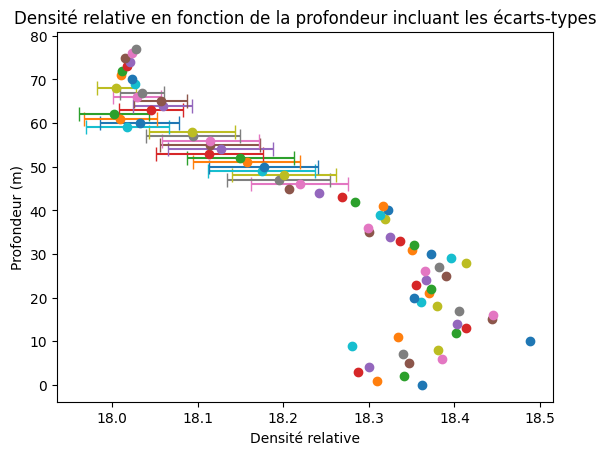

In [171]:
for i in range(len(levels)):
    plt.errorbar(densité_relative[i,i%densité_relative.shape[1]],levels[i],xerr=écarts_types_densité_relative[i], fmt="-o", capsize=5)

plt.xlabel("Densité relative")
plt.ylabel("Profondeur (m)")
plt.title("Densité relative en fonction de la profondeur incluant les écarts-types")


**Q7) Prise en compte des données manquantes**

Les profils contiennent de nombreuses valeurs manquantes. Celles-ci sont indiquées par la valeur spéciale "Not a Number", ou `np.nan`.

Lorsque vous prenez la moyenne ou l'écart type des données contenant des NaN, le résultat entier devient `NaN`. Au lieu de cela, si vous utilisez les fonctions spéciales `np.nanmean` et `np.nanstd`, vous dites à NumPy d'ignorer les NaN.

Recalculez les moyennes et les écarts types comme dans les sections précédentes en utilisant ces fonctions et tracez les résultats.

Conseil : Liens vers la documentation [`np.nanmean`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) et la documentation [`np.nanstd`](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculez les moyennes ci-dessous en ignorant les valeurs manquantes. Nous espérons que vous pouvez maintenant trouver la syntaxe complète vous-même 😎

In [173]:
moyenne_T_sans_nan = np.nanmean(T,axis=1)

In [174]:
moyenne_S_sans_nan = np.nanmean(S,axis=1)

In [175]:
moyenne_P_sans_nan = np.nanmean(P,axis=1)

In [172]:
moyenne_densité_relative_sans_nan = np.nanmean(densité_relative,axis=1)

De même, recalculez les écarts types en ignorant les valeurs manquantes.

In [176]:
écarts_types_T_sans_nan = np.nanstd(T,axis=1)

In [177]:
écarts_types_S_sans_nan = np.nanstd(S,axis=1)

In [178]:
écarts_types_P_sans_nan = np.nanstd(P,axis=1)

In [179]:
écarts_types_densité_relative_sans_nan = np.nanstd(densité_relative,axis=1)

**Q8) Créez un diagramme de dispersion des coordonnées longitudinales (`lon`) et latitudinales (`lat`) des flotteurs ARGO.**

Encore une fois, nous n'en avons pas parlé dans le tutoriel, mais il existe une fonction de diagramme de dispersion très pratique appelée [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) fournie par l'interface Pyplot.

Bonus : Etiqueter votre figure en utilisant `plt.xlabel`, `plt.ylabel`, et `plt.title`.

Bonus 2 : Augmentez la taille de police de vos étiquettes en ajoutant un argument `fontsize=` aux fonctions d'étiquettes.

Bonus 3 : Rendez votre diagramme de dispersion plus beau en changeant les arguments de [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listés dans la documentation, par exemple `s=`.

In [ ]:
plt.scatter(___,___)
___ # Bonus
___ # Plus de bonus

## Fonctions

**Q1) Ecrivez une fonction pour convertir l'unité que vous avez choisie pour les masses planétaires en $M_{Terre}$, la masse de la Terre**.

Par exemple, la masse de Jupiter est :

$M_{Jupiter} \approx 1898\times10^{24}kg \approx 318 M_{Terre}$

In [183]:
# Write your code here
planetdict = {'mercure':0.330,'vénus':4.87,'terre':5.97,
              'mars':0.642,'jupiter':1898,'saturne':568,'uranus':86.8,'nepturne':102, 'pluto':0.013}

# unit: 10^24 kg

In [185]:
#write function here
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la planète que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])
def convert_mass_Mterre(planet):
  return planetdict[planet]/planetdict['terre']

#tester que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183
result = convert_mass_Mterre('jupiter')
print(result)

317.92294807370183


**Q2) Ecrivez maintenant une fonction unique qui peut convertir l'unité que vous avez choisie pour les masses planétaires en $M_{Terre}$ ou $M_{Jupiter}$ selon le mot-clé que vous avez spécifié**.

In [189]:
# Écrivez votre fonction ici
def convert_m_Mterrejupiter(planet,ourplanet='jupiter') :
  return planetdict[planet]/planetdict[ourplanet]

# Vérifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)
print(convert_m_Mterrejupiter('jupiter','terre'),convert_m_Mterrejupiter('jupiter','jupiter'))

317.92294807370183 1.0


In [192]:
# Stocker le Mjupiter pour Q3
Mjupiter = convert_m_Mterrejupiter('jupiter', 'jupiter')

**Q3) Ecrivez une fonction qui prend un argument (la masse en $M_{Jupiter}$) et renvoie deux arguments (la masse en $M_{Terre}$ et la masse dans l'unité que vous avez choisie [la planète que vous voulez]).

In [195]:
# Écrivez votre fonction ici
def mass_conversion_two_arguments(mass,planet='mars') :
  a = mass/planetdict['terre'] # Terre
  b = mass/planetdict[planet] # La planète que vous voulez utiliser comme référence
  return a,b
# Vérifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unité choisie (par exemple, la planète Mars)
print(mass_conversion_two_arguments(planetdict['jupiter'],'mars'))

(317.92294807370183, 2956.386292834891)


In [ ]:
# Bonus : Utilisez la fonction de Q10 pour convertir la masse de Neptune en $M_{Jupiter}$.
# puis la fonction de Q3 pour la reconvertir dans l'unité que vous avez choisie
# Retrouvez-vous la valeur originale ?